# 1
Due to large sizes of data sets in practice one need to do dimension reduction thereafter
study the pattern by various clusterings techniques. Dimension reduction means lost
of certain information whence less accuracy of clustering results in general. In this
question, we consider the Iris data set as four dimensional data set with the ground
truce lab el: setosa, versicolor, virginica and use the k-means for clustering.

In [58]:
from sklearn import datasets
import numpy as np

df = datasets.load_iris(as_frame=True)
features = df.data
target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

## a)
First determine three clusters of Iris data set by k-means, and even compute the percentage of correct classied observations.

In [84]:
from sklearn.cluster import KMeans
np.random.seed(1)

kmeans_a = KMeans(n_clusters=3).fit(X=features)
pred_a = kmeans_a.predict(features)

pred_a

c:\Users\ap9169\eda-exam\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [96]:
# matrix of clusters with target
import pandas as pd
confusion_a = pd.DataFrame({'true': target, 'cluster': pred_a})
confusion_a = confusion_a.value_counts().unstack(fill_value=0)
confusion_a.columns = ['Cluster ' + str(i+1) for i in confusion_a.columns]
confusion_a.loc['Total'] = confusion_a.sum()
confusion_a

,Cluster 1,Cluster 2,Cluster 3
true,,,
setosa,0,50,0
versicolor,47,0,3
virginica,14,0,36
Total,61,50,39


In [ ]:
# percentages
conf_a_perc = confusion_a.copy()
conf_a_perc["Cluster 1"] = np.round(conf_a_perc["Cluster 1"] / conf_a_perc.loc["Total", "Cluster 1"], 2)
conf_a_perc["Cluster 2"] = np.round(conf_a_perc["Cluster 2"] / conf_a_perc.loc["Total", "Cluster 2"], 2)
conf_a_perc["Cluster 3"] = np.round(conf_a_perc["Cluster 3"] / conf_a_perc.loc["Total", "Cluster 3"], 2)
conf_a_perc

,Cluster 1,Cluster 2,Cluster 3
true,,,
setosa,0.00,1.0,0.00
versicolor,0.77,0.0,0.08
virginica,0.23,0.0,0.92
Total,1.00,1.0,1.00


## b) 
Now apply first the factor analysis metho d to reduce the Iris data set to two
dimensional, then determine three clusters of the reduce data set by k-means.
What is then the p ercentage of correct classified observations ? Even visualize the
reduced data set with original lab el resp ectively by the clustering.

In [63]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2).fit_transform(features)
fa

array([[-1.32761727e+00, -5.61310764e-01],
       [-1.33763854e+00, -2.79764907e-03],
       [-1.40281483e+00,  3.06349492e-01],
       [-1.30104274e+00,  7.18826835e-01],
       [-1.33342439e+00, -3.64588985e-01],
       [-1.14667134e+00, -1.04228193e+00],
       [-1.35307178e+00,  5.74473558e-01],
       [-1.27940722e+00, -2.33129838e-01],
       [-1.36530876e+00,  1.12229944e+00],
       [-1.28651978e+00,  4.72301660e-02],
       [-1.25777170e+00, -1.18508651e+00],
       [-1.23700429e+00,  2.91772867e-01],
       [-1.34543381e+00,  2.06818259e-01],
       [-1.53401771e+00,  1.05544473e+00],
       [-1.39682229e+00, -2.38993243e+00],
       [-1.23819458e+00, -1.98969103e+00],
       [-1.36091949e+00, -1.37946760e+00],
       [-1.32540156e+00, -5.50623528e-01],
       [-1.13192081e+00, -1.69029724e+00],
       [-1.27252223e+00, -5.37071207e-01],
       [-1.14996491e+00, -9.45749580e-01],
       [-1.27007895e+00, -5.02802605e-01],
       [-1.56999078e+00,  1.79437924e-01],
       [-1.

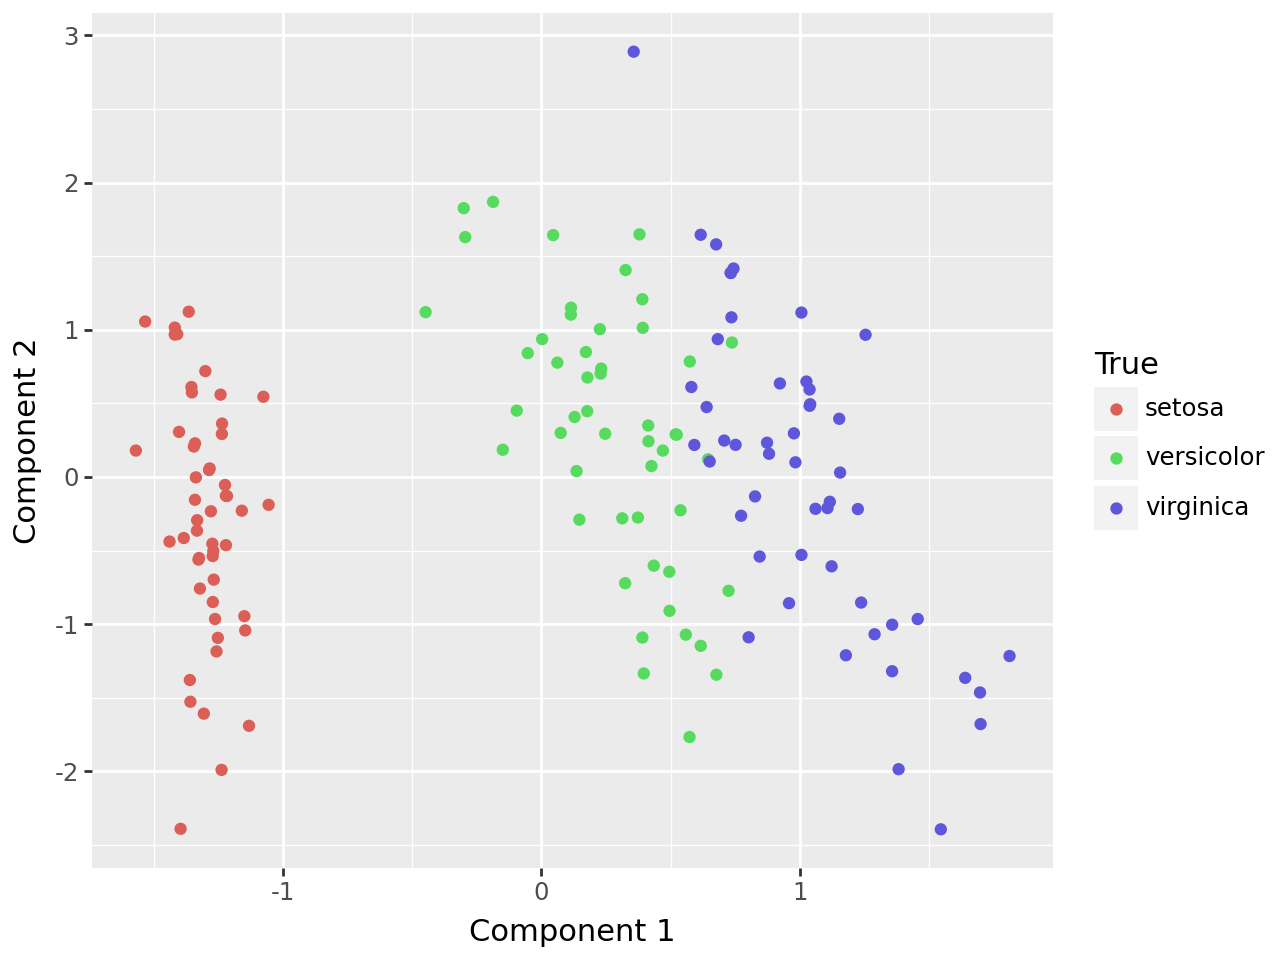

In [67]:
from plotnine import *
fa_df = pd.DataFrame(fa, columns=['Component 1', 'Component 2'])
fa_df["True"] = target

(
  ggplot(aes(x='Component 1', y='Component 2', color='True'), fa_df) +
  geom_point() 
)

In [123]:
np.random.seed(1)
kmeans_b = KMeans(n_clusters=3).fit(X=fa)
pred = kmeans_b.predict(fa)
confusion_b = pd.DataFrame({'true': target, 'cluster': pred})
confusion_b = confusion_b.value_counts().unstack(fill_value=0)
confusion_b.columns = ['Cluster ' + str(i+1) for i in confusion_b.columns]
confusion_b.loc['Total'] = confusion_b.sum()
conf_b_perc = confusion_b.copy()
conf_b_perc["Cluster 1"] = np.round(conf_b_perc["Cluster 1"] / conf_b_perc.loc["Total", "Cluster 1"], 2)
conf_b_perc["Cluster 2"] = np.round(conf_b_perc["Cluster 2"] / conf_b_perc.loc["Total", "Cluster 2"], 2)
conf_b_perc["Cluster 3"] = np.round(conf_b_perc["Cluster 3"] / conf_b_perc.loc["Total", "Cluster 3"], 2)
# join the two confusion matrices, build the string as total (perc)
confusion_b_merged = confusion_b.merge(conf_b_perc, on="true", suffixes=('_total', '_perc'))
confusion_b_merged["Cluster 1"] = confusion_b_merged["Cluster 1_total"].astype(str) + " (" + confusion_b_merged["Cluster 1_perc"].astype(str) + ")"
confusion_b_merged["Cluster 2"] = confusion_b_merged["Cluster 2_total"].astype(str) + " (" + confusion_b_merged["Cluster 2_perc"].astype(str) + ")"
confusion_b_merged["Cluster 3"] = confusion_b_merged["Cluster 3_total"].astype(str) + " (" + confusion_b_merged["Cluster 3_perc"].astype(str) + ")"
confusion_b_merged = confusion_b_merged[["Cluster 1", "Cluster 2", "Cluster 3"]]
confusion_b_merged

c:\Users\ap9169\eda-exam\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


,Cluster 1,Cluster 2,Cluster 3
true,,,
setosa,0 (0.0),50 (1.0),0 (0.0)
versicolor,15 (0.38),0 (0.0),35 (0.57)
virginica,24 (0.62),0 (0.0),26 (0.43)
Total,39 (1.0),50 (1.0),61 (1.0)


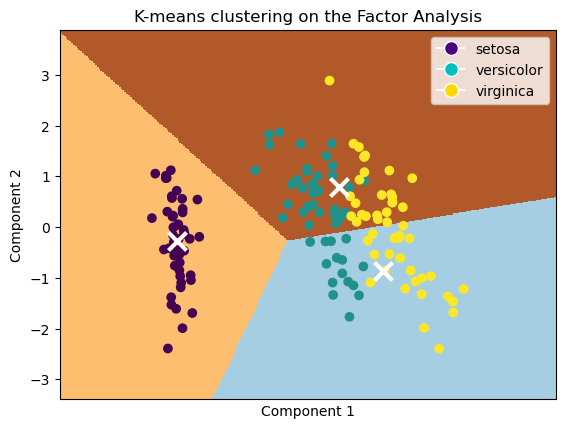

In [143]:
import matplotlib.pyplot as plt

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = fa[:, 0].min() - 1, fa[:, 0].max() + 1
y_min, y_max = fa[:, 1].min() - 1, fa[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_b.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# Plot the centroids as a white X
centroids = kmeans_b.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# add color to each point as the true
plt.scatter(fa[:, 0], fa[:, 1], c=target.map({'setosa': 0, 'versicolor': 1, 'virginica': 2}))
# add legend to this last scatter
# https://i.pinimg.com/originals/84/7f/51/847f5100d01c7d1896d287377fea7308.png
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='setosa', markerfacecolor='indigo', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='versicolor', markerfacecolor='c', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='virginica', markerfacecolor='gold', markersize=10)])

plt.title("K-means clustering on the Factor Analysis")
plt.xticks(())
plt.show()